## *Review Sentiment Prediction using Count Vectorization and Logistic Regression*

#### *Importing Libraries*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### *Data Collection and Preprocessing*

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df.sample(5)

,Review,Liked
567,Food was delicious!,1
979,I kept looking at the time and it had soon bec...,0
388,This is a disgrace.,0
411,"Come hungry, leave happy and stuffed!",1
816,The food was terrible.,0


In [4]:
df.shape

(1000, 2)

In [5]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

#### *Importing text processing libraries (Regular Expression and Natural Language Toolkit*

In [6]:
import re
# import nltk

#### *Downloading stopwords from NLTK module*

In [7]:
# nltk.download('stopwords')

#### *Importing stopwords and Porter Stemmer (Stemming Library) from nltk*

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#### *Text Preprocessing and Corpus Creation*

In [9]:
corpus = []
for i in range(0, 1000):

    #Keep only letters
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i,0])      #Keep only letters
    review = review.lower() 

    #Split each word for stemming
    review = review.split()

    #Initialize Stemmer
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')

    #Keep negation words (important in sentiment analysis)
    for word in ["not", "no", "nor", "never", "none", "cannot", "hardly", "barely", "wasn", "isn"]:
        if word in all_stopwords:
            all_stopwords.remove(word)

    #Remove stopwords (barring the negation words) and apply stemming
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]

    #Join words back into a string
    review = ' '.join(review)
    corpus.append(review)

In [10]:
type(corpus)

list

#### *Step-by-Step execution of a single review (for understanding purpose)*

In [11]:
# df.iloc[111,0]

In [12]:
# review = re.sub('[^a-zA-Z]', ' ', df.iloc[111,0])
# review = review.lower()
# review = review.split()
# ps = PorterStemmer()
# all_stopwords = stopwords.words('english')
# for word in ["not", "no", "nor", "never", "none", "cannot", "hardly", "barely", "wasn", "isn"]:
#     if word in all_stopwords:
#         all_stopwords.remove(word)
# review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
# review = ' '.join(review)
# review

#### *Implementing Count Vectorizer*

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

#using bigrams for capturing context
cv = CountVectorizer(max_features=6000, ngram_range=(1,2))

#Convert the corpus from list to array
X = cv.fit_transform(corpus).toarray()     
y = df.iloc[:,-1].values

#### *Splitting the dataset into the Training set and Test set*

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### *Building the Logistic Regression model*

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

#### *side-by-side comparison of y_pred and y_test*

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]

#### *Evaluating the model*

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

print("Accuracy =",accuracy_score(y_test, y_pred)*100)

Accuracy = 78.0


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        96
           1       0.84      0.71      0.77       104

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



#### *Evaluating the model using cross validation over 10 folds*

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=10)
print(f"Cross Validation Accuracy = {scores.mean()*100:.2f}")

Cross Validation Accuracy = 81.70


#### *Plotting the Confusion Matrix*

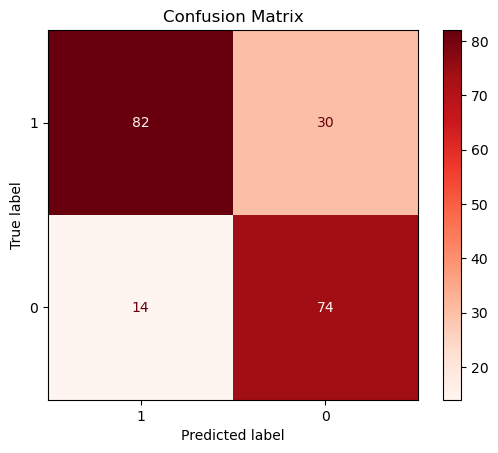

In [20]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["Liked"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

#### *Predicting for a single (unseen) input*

In [21]:
input_review = ["The staff was extremely helpful and friendly. I had a wonderful shopping experience."]

vect_input = cv.transform(input_review)

prediction = classifier.predict(vect_input)

print(prediction)

if prediction[0] == 0:
    print("Not Liked")
else:
    print("Liked")



[1]
Liked
